In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [6]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
import skimage
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.models import load_model
from keras.regularizers import l1,l2,L1L2
from tensorflow.keras import regularizers
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15292\1071619045.py:21: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve


In [7]:
Indian_Sign_Main_Path = Path(r"C:\Users\ASUS\Downloads\archive (3).csv")

In [8]:
Sign_JPG = list(Indian_Sign_Main_Path.rglob("*.jpg")) + list(Indian_Sign_Main_Path.rglob("*.JPG"))
print("Total images found:", len(Sign_JPG))

Total images found: 84250


In [9]:
Sign_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Sign_JPG))


In [10]:
Sign_JPG_Series = pd.Series(Sign_JPG,name="JPG").astype(str)
Sign_Labels_Series = pd.Series(Sign_Labels,name="CATEGORY")


In [11]:
Main_Sign_Data = pd.concat([Sign_JPG_Series,Sign_Labels_Series],axis=1)


In [12]:
print(Main_Sign_Data.head(-1))


                                                     JPG CATEGORY
0      C:\Users\ASUS\Downloads\archive (3).csv\data\1...        1
1      C:\Users\ASUS\Downloads\archive (3).csv\data\1...        1
2      C:\Users\ASUS\Downloads\archive (3).csv\data\1...        1
3      C:\Users\ASUS\Downloads\archive (3).csv\data\1...        1
4      C:\Users\ASUS\Downloads\archive (3).csv\data\1...        1
...                                                  ...      ...
84244  C:\Users\ASUS\Downloads\archive (3).csv\data\Z...        Z
84245  C:\Users\ASUS\Downloads\archive (3).csv\data\Z...        Z
84246  C:\Users\ASUS\Downloads\archive (3).csv\data\Z...        Z
84247  C:\Users\ASUS\Downloads\archive (3).csv\data\Z...        Z
84248  C:\Users\ASUS\Downloads\archive (3).csv\data\Z...        Z

[84249 rows x 2 columns]


In [13]:
Main_Sign_Data = Main_Sign_Data.sample(frac=1).reset_index(drop=True)


In [14]:
print(Main_Sign_Data.head(-1))


                                                     JPG CATEGORY
0      C:\Users\ASUS\Downloads\archive (3).csv\data\5...        5
1      C:\Users\ASUS\Downloads\archive (3).csv\data\R...        R
2      C:\Users\ASUS\Downloads\archive (3).csv\data\B...        B
3      C:\Users\ASUS\Downloads\archive (3).csv\data\2...        2
4      C:\Users\ASUS\Downloads\archive (3).csv\data\C...        C
...                                                  ...      ...
84244  C:\Users\ASUS\Downloads\archive (3).csv\data\8...        8
84245  C:\Users\ASUS\Downloads\archive (3).csv\data\6...        6
84246  C:\Users\ASUS\Downloads\archive (3).csv\data\X...        X
84247  C:\Users\ASUS\Downloads\archive (3).csv\data\P...        P
84248  C:\Users\ASUS\Downloads\archive (3).csv\data\U...        U

[84249 rows x 2 columns]


In [15]:
def simple_vision(img_path):
    Picking_Img = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)
    
    return Picking_Img


In [16]:
def threshold_vision(img_path):
    Picking_Img = simple_vision(img_path)
    Gray_Img = cv2.cvtColor(Picking_Img,cv2.COLOR_RGB2GRAY)
    _,threshold_Img = cv2.threshold(Gray_Img,90,255,cv2.THRESH_BINARY_INV)
    
    return threshold_Img


In [17]:
def canny_vision(img_path):
    Threshold_Img = threshold_vision(img_path)
    Canny_Img = cv2.Canny(Threshold_Img,10,100)
    
    return Canny_Img

In [18]:
def skeleton_morph_vision(img_path):
    Picking_Img = simple_vision(img_path)
    Gray_Img = cv2.cvtColor(Picking_Img,cv2.COLOR_RGB2GRAY)
    _,Threshold_Img = cv2.threshold(Gray_Img,90,255,cv2.THRESH_BINARY_INV)
    
    Array_Img = np.array(Gray_Img > Threshold_Img).astype(int)
    Skeleton_Img = skimage.morphology.skeletonize(Array_Img)
    
    return Skeleton_Img


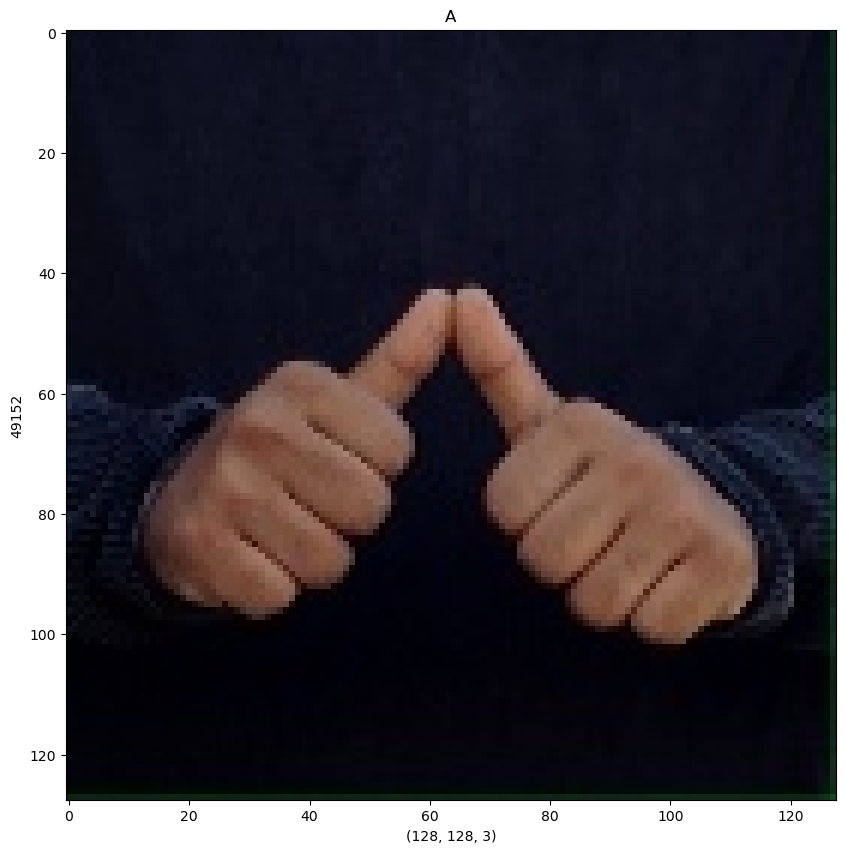

In [19]:
figure = plt.figure(figsize=(10,10))

Image_Sign = simple_vision(Main_Sign_Data["JPG"][33])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][33])
plt.imshow(Image_Sign)

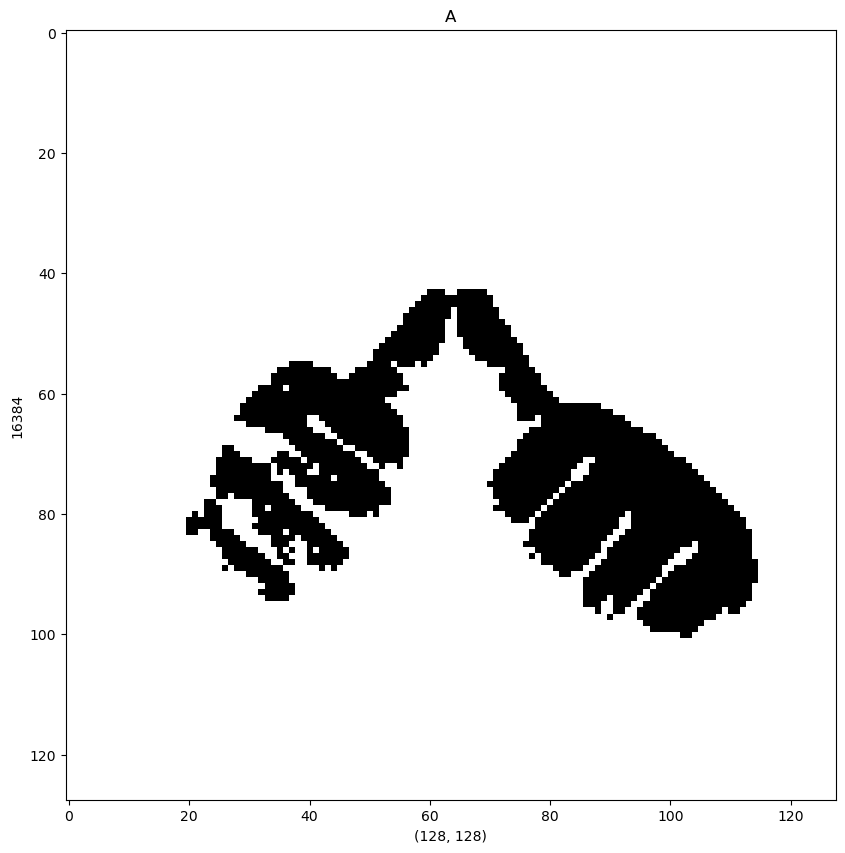

In [20]:
figure = plt.figure(figsize=(10,10))

Image_Sign = threshold_vision(Main_Sign_Data["JPG"][33])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][33])
plt.imshow(Image_Sign,cmap="gray")


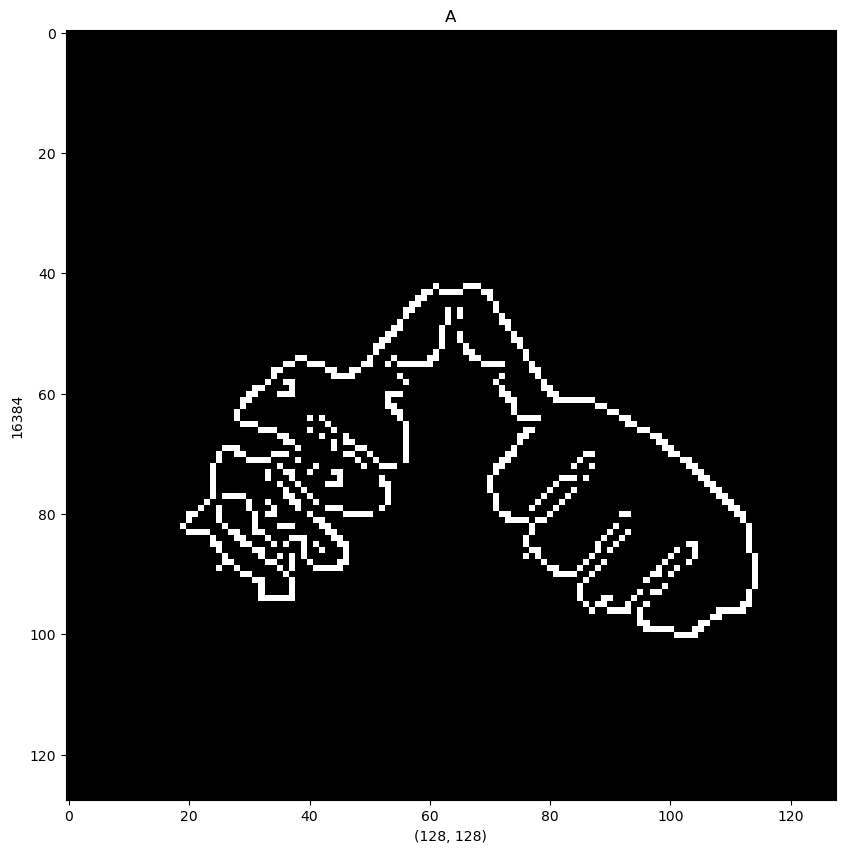

In [21]:
figure = plt.figure(figsize=(10,10))

Image_Sign = canny_vision(Main_Sign_Data["JPG"][33])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][33])
plt.imshow(Image_Sign,cmap="gray")

Text(0.5, 1.0, 'A')

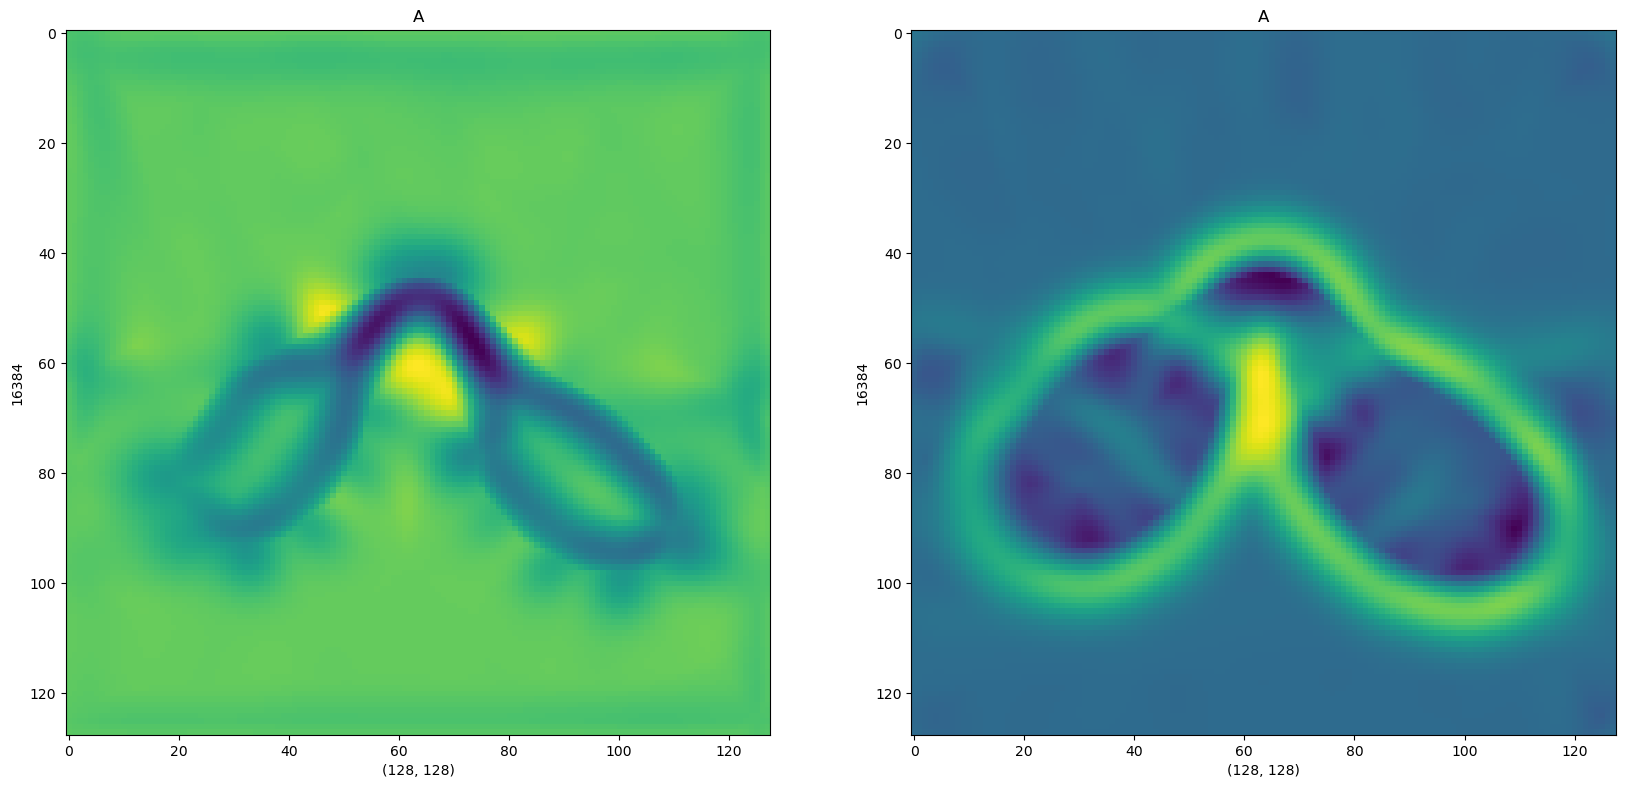

In [22]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(20,20))

Example_Image = cv2.cvtColor(cv2.imread(Main_Sign_Data["JPG"][33]),cv2.COLOR_BGR2GRAY)

Hessian_Mat = hessian_matrix(Example_Image,sigma=5,order="rc")
max_S,min_S = hessian_matrix_eigvals(Hessian_Mat)

axis[0].imshow(min_S)
axis[0].set_xlabel(min_S.shape)
axis[0].set_ylabel(min_S.size)
axis[0].set_title(Main_Sign_Data["CATEGORY"][33])
axis[1].imshow(max_S)
axis[1].set_xlabel(max_S.shape)
axis[1].set_ylabel(max_S.size)
axis[1].set_title(Main_Sign_Data["CATEGORY"][33])


Text(0.5, 1.0, 'A')

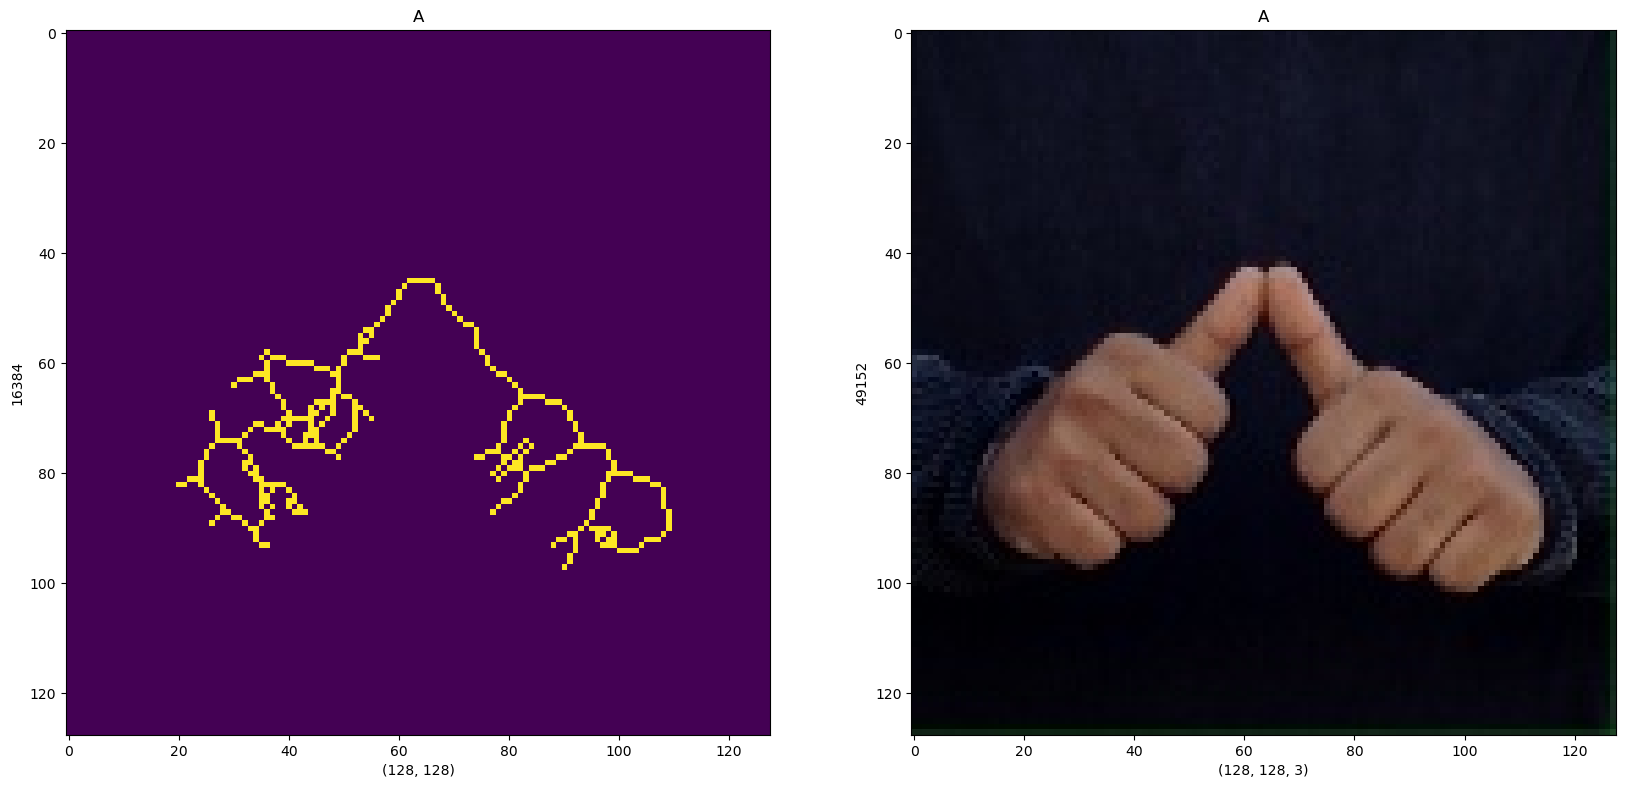

In [23]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(20,20))

Skel_Img = skeleton_morph_vision(Main_Sign_Data["JPG"][33])
Simple_Img = simple_vision(Main_Sign_Data["JPG"][33])

axis[0].imshow(Skel_Img)
axis[0].set_xlabel(Skel_Img.shape)
axis[0].set_ylabel(Skel_Img.size)
axis[0].set_title(Main_Sign_Data["CATEGORY"][33])
axis[1].imshow(Simple_Img)
axis[1].set_xlabel(Simple_Img.shape)
axis[1].set_ylabel(Simple_Img.size)
axis[1].set_title(Main_Sign_Data["CATEGORY"][33])


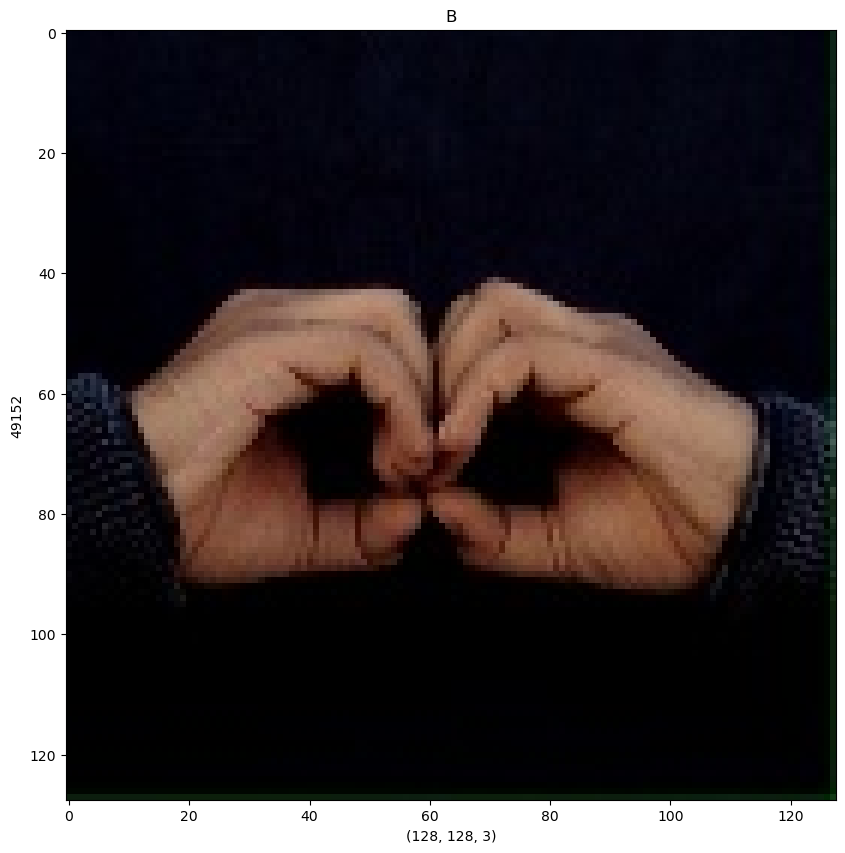

In [24]:
figure = plt.figure(figsize=(10,10))

Image_Sign = simple_vision(Main_Sign_Data["JPG"][41113])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][41113])
plt.imshow(Image_Sign)


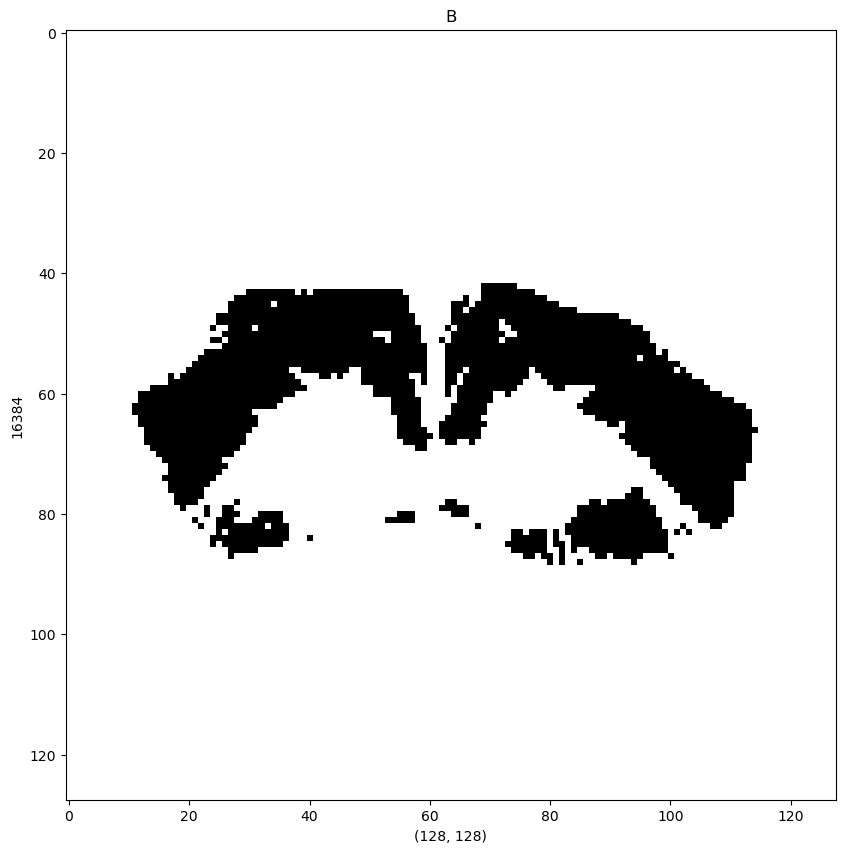

In [25]:
figure = plt.figure(figsize=(10,10))

Image_Sign = threshold_vision(Main_Sign_Data["JPG"][41113])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][41113])
plt.imshow(Image_Sign,cmap="gray")


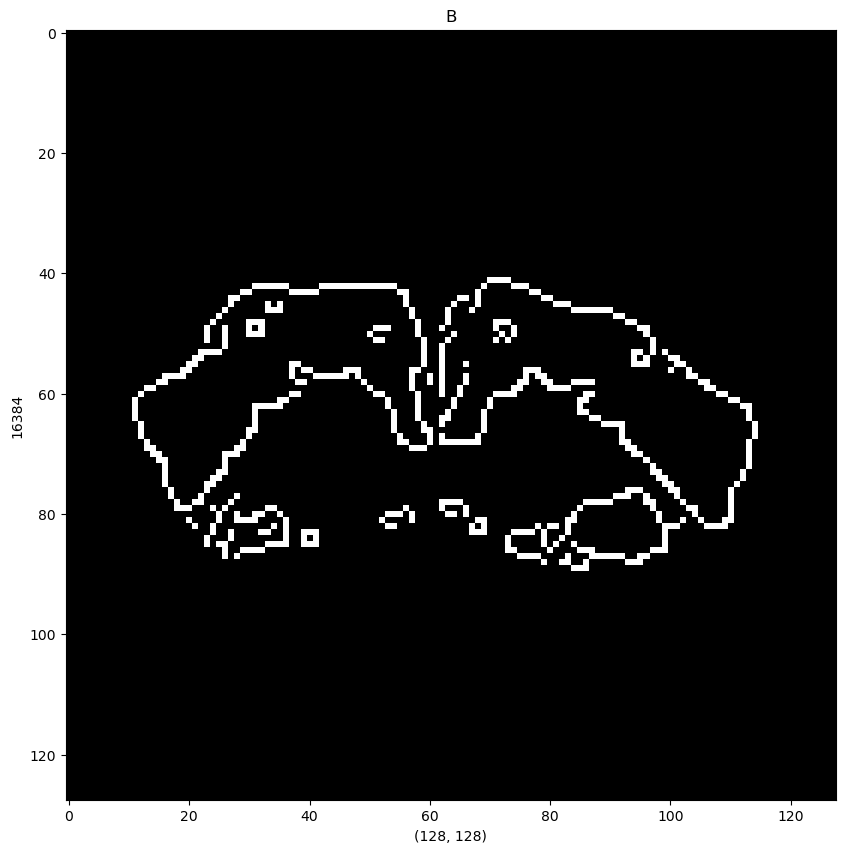

In [26]:
figure = plt.figure(figsize=(10,10))

Image_Sign = canny_vision(Main_Sign_Data["JPG"][41113])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][41113])
plt.imshow(Image_Sign,cmap="gray")

Text(0.5, 1.0, 'B')

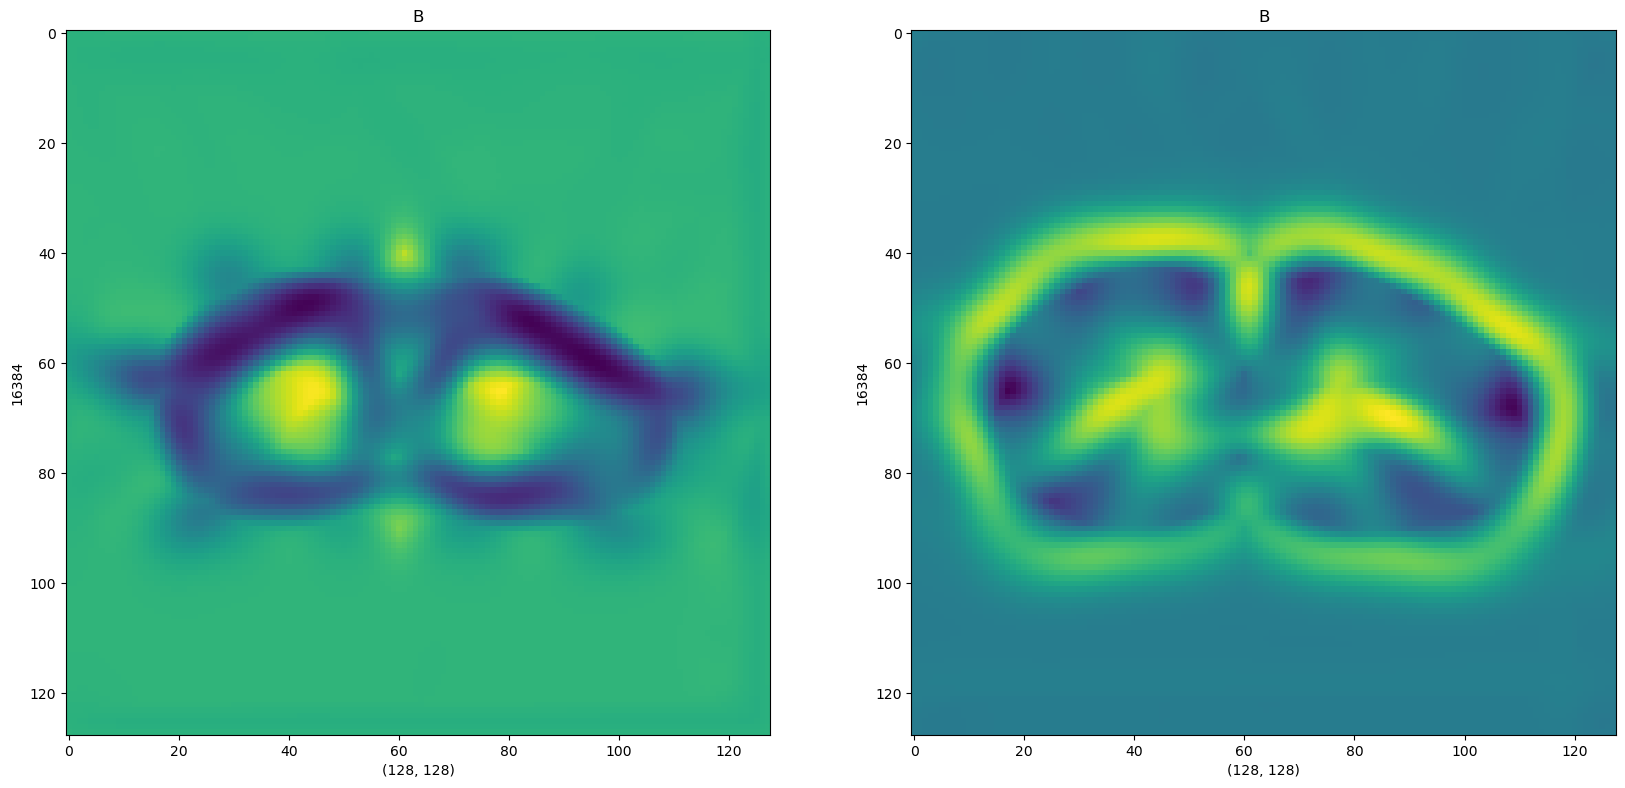

In [27]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(20,20))

Example_Image = cv2.cvtColor(cv2.imread(Main_Sign_Data["JPG"][41113]),cv2.COLOR_BGR2GRAY)

Hessian_Mat = hessian_matrix(Example_Image,sigma=5,order="rc")
max_S,min_S = hessian_matrix_eigvals(Hessian_Mat)

axis[0].imshow(min_S)
axis[0].set_xlabel(min_S.shape)
axis[0].set_ylabel(min_S.size)
axis[0].set_title(Main_Sign_Data["CATEGORY"][41113])
axis[1].imshow(max_S)
axis[1].set_xlabel(max_S.shape)
axis[1].set_ylabel(max_S.size)
axis[1].set_title(Main_Sign_Data["CATEGORY"][41113])


Text(0.5, 1.0, 'B')

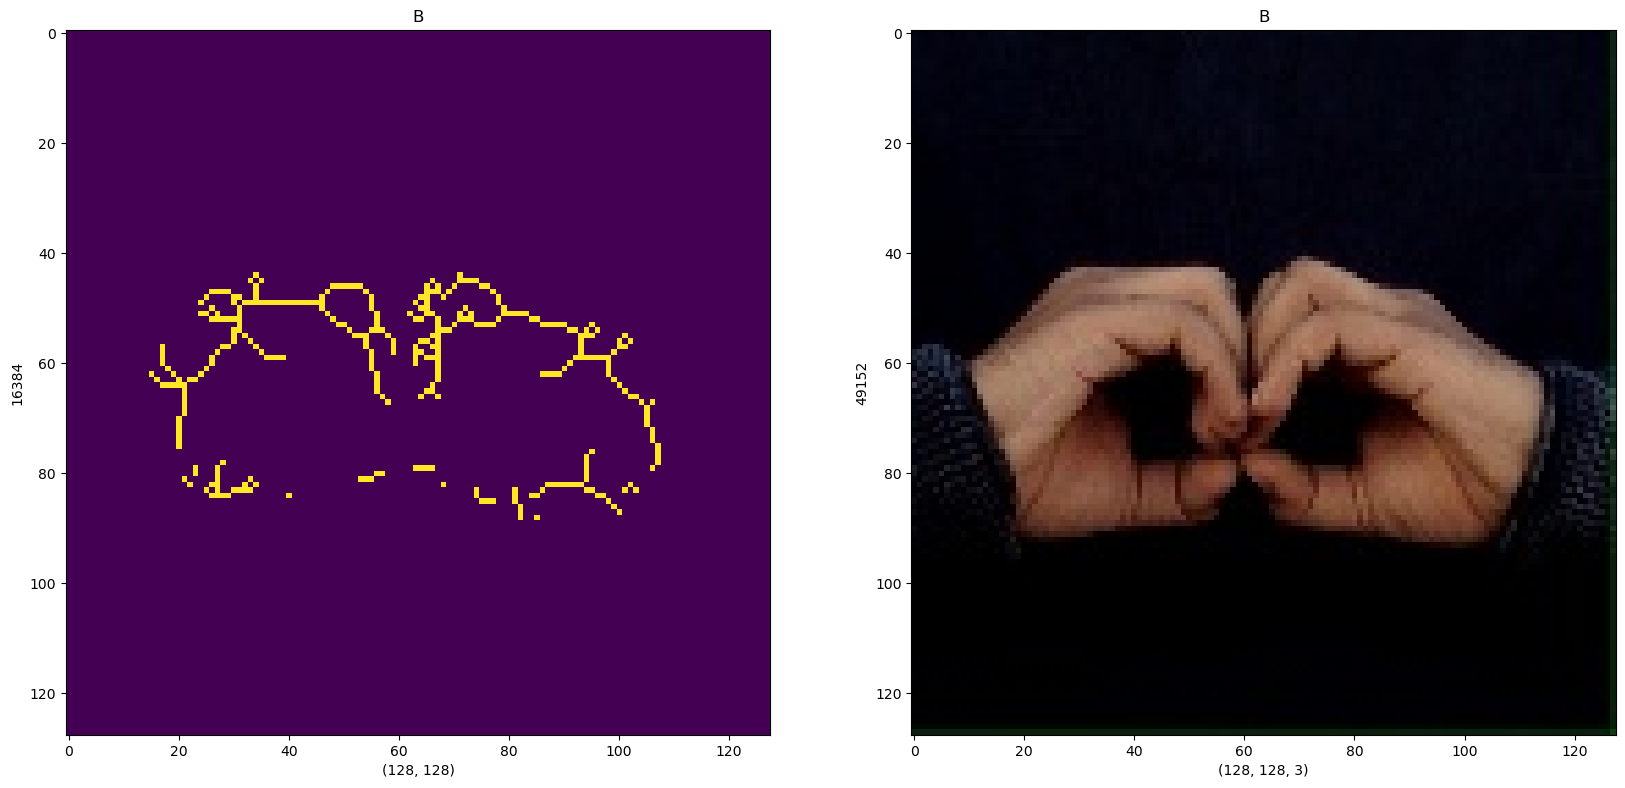

In [28]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(20,20))

Skel_Img = skeleton_morph_vision(Main_Sign_Data["JPG"][41113])
Simple_Img = simple_vision(Main_Sign_Data["JPG"][41113])

axis[0].imshow(Skel_Img)
axis[0].set_xlabel(Skel_Img.shape)
axis[0].set_ylabel(Skel_Img.size)
axis[0].set_title(Main_Sign_Data["CATEGORY"][41113])
axis[1].imshow(Simple_Img)
axis[1].set_xlabel(Simple_Img.shape)
axis[1].set_ylabel(Simple_Img.size)
axis[1].set_title(Main_Sign_Data["CATEGORY"][41113])

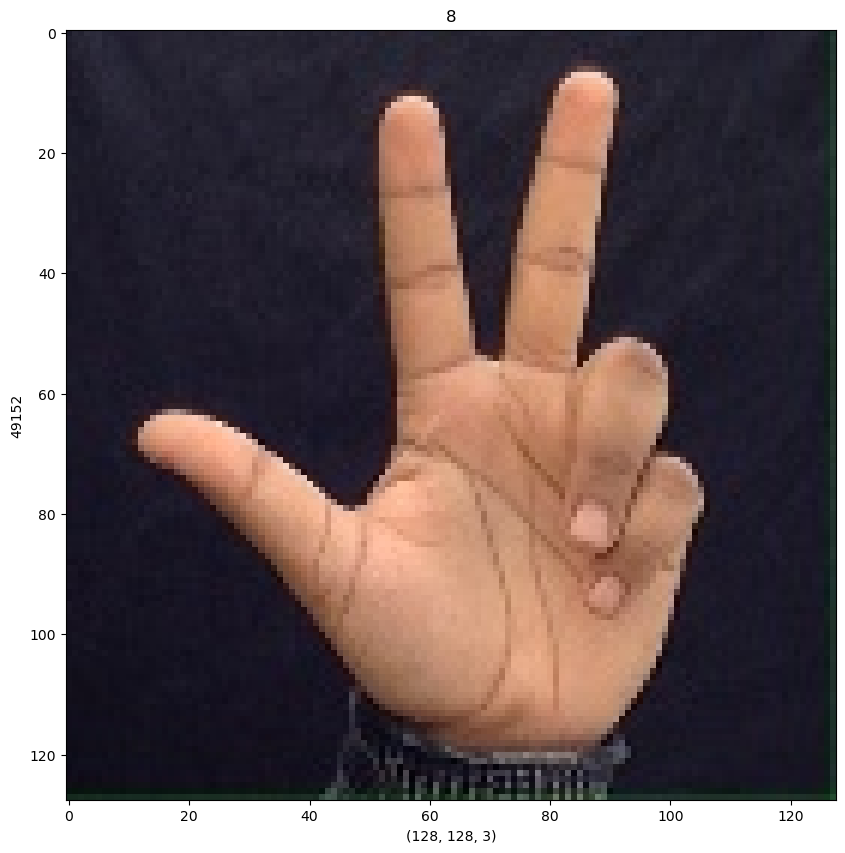

In [29]:
figure = plt.figure(figsize=(10,10))

Image_Sign = simple_vision(Main_Sign_Data["JPG"][22213])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][22213])
plt.imshow(Image_Sign)

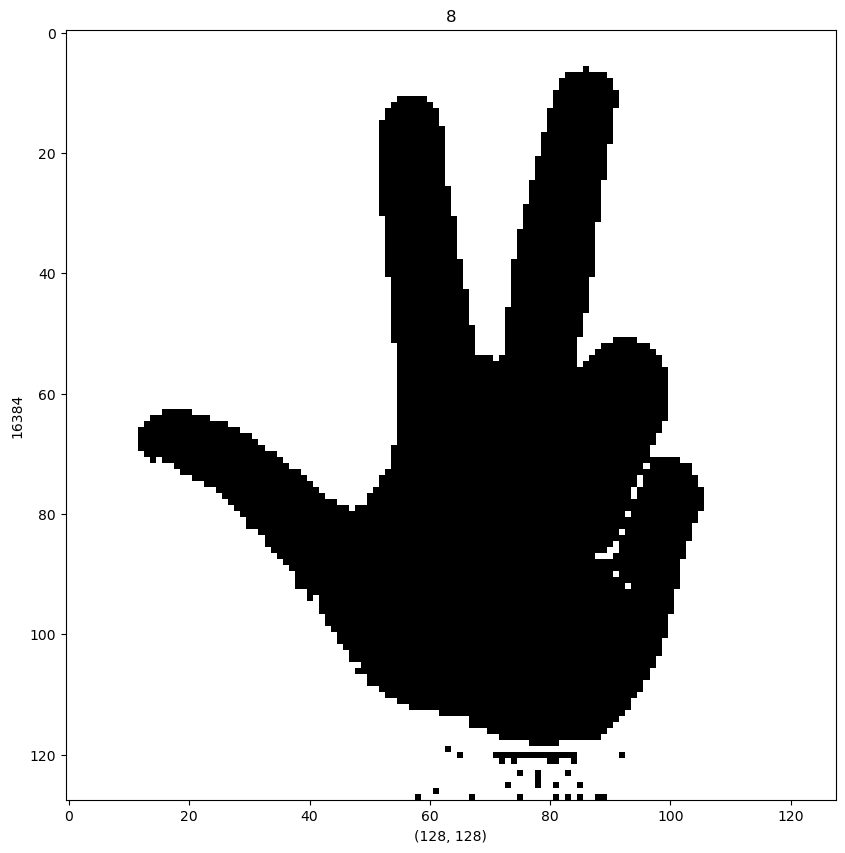

In [30]:
figure = plt.figure(figsize=(10,10))

Image_Sign = threshold_vision(Main_Sign_Data["JPG"][22213])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][22213])
plt.imshow(Image_Sign,cmap="gray")


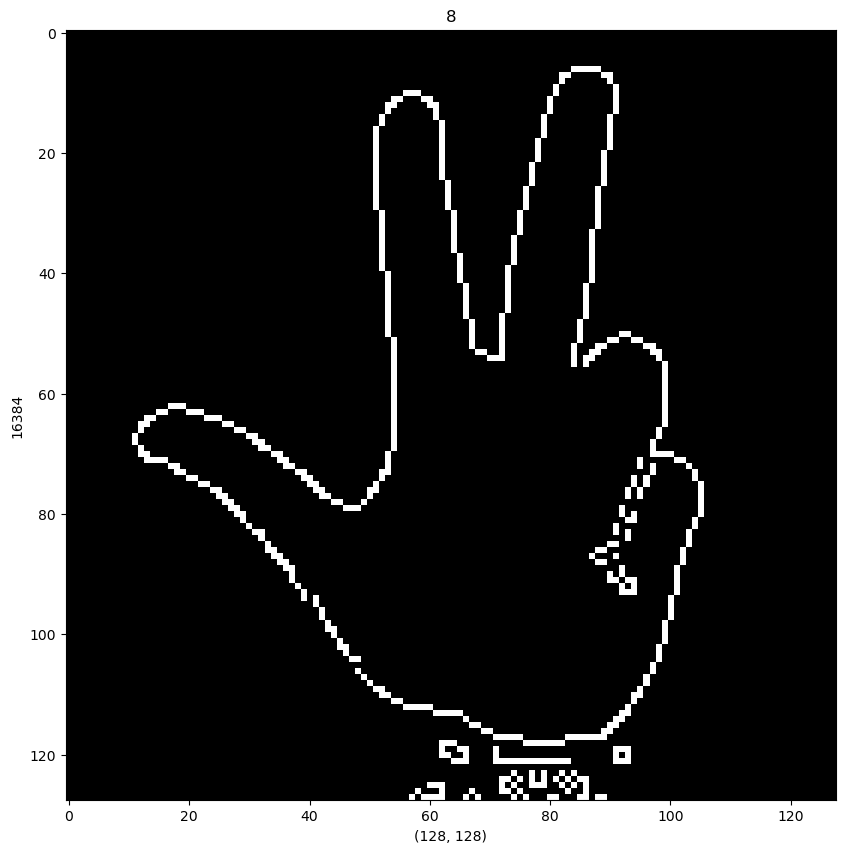

In [31]:
figure = plt.figure(figsize=(10,10))

Image_Sign = canny_vision(Main_Sign_Data["JPG"][22213])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][22213])
plt.imshow(Image_Sign,cmap="gray")


Text(0.5, 1.0, '8')

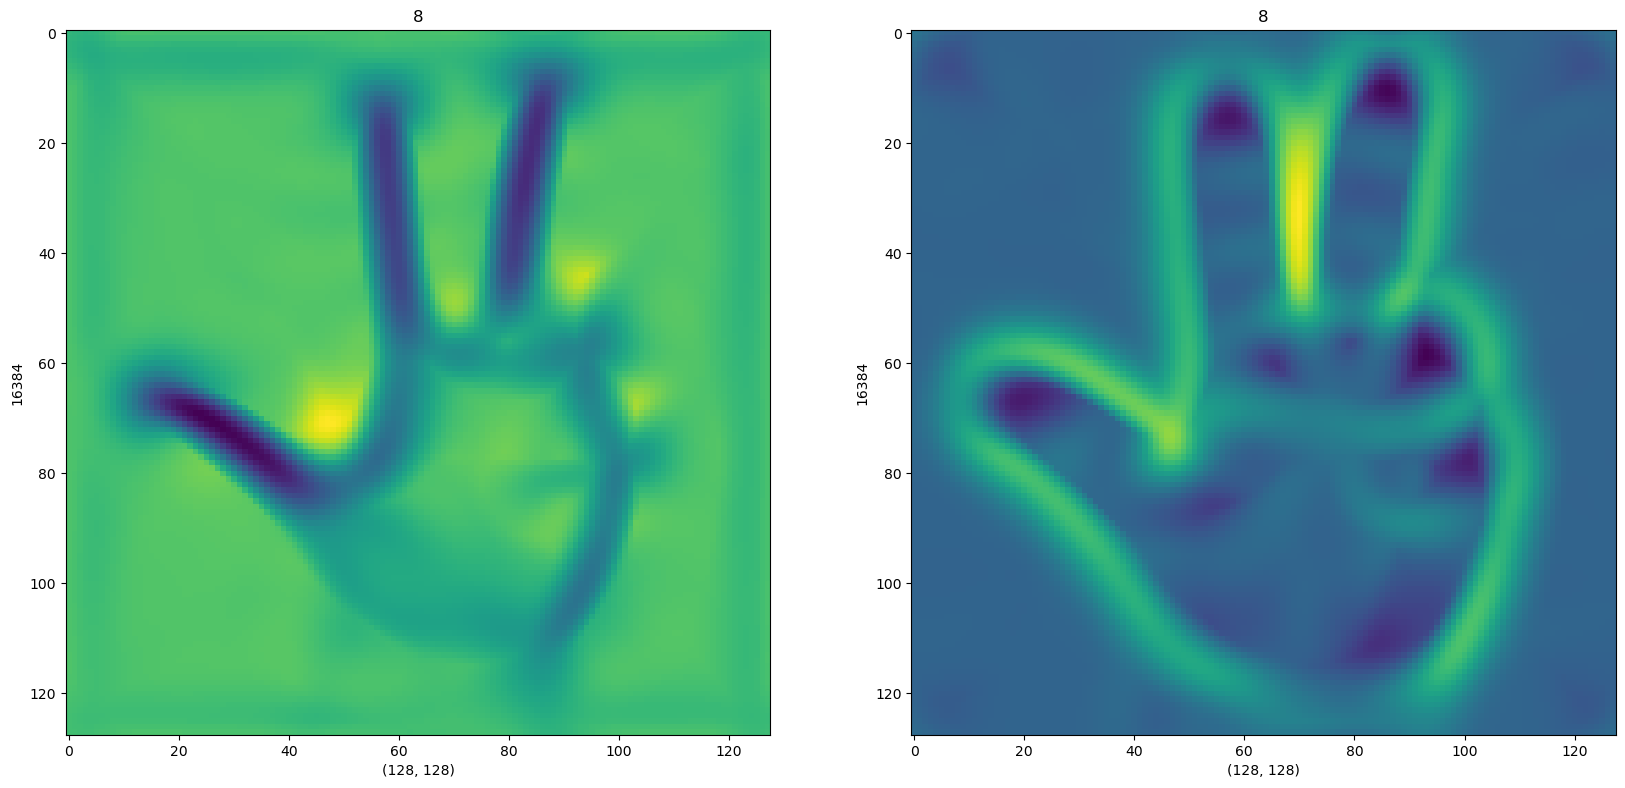

In [32]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(20,20))

Example_Image = cv2.cvtColor(cv2.imread(Main_Sign_Data["JPG"][22213]),cv2.COLOR_BGR2GRAY)

Hessian_Mat = hessian_matrix(Example_Image,sigma=5,order="rc")
max_S,min_S = hessian_matrix_eigvals(Hessian_Mat)

axis[0].imshow(min_S)
axis[0].set_xlabel(min_S.shape)
axis[0].set_ylabel(min_S.size)
axis[0].set_title(Main_Sign_Data["CATEGORY"][22213])
axis[1].imshow(max_S)
axis[1].set_xlabel(max_S.shape)
axis[1].set_ylabel(max_S.size)
axis[1].set_title(Main_Sign_Data["CATEGORY"][22213])

Text(0.5, 1.0, '8')

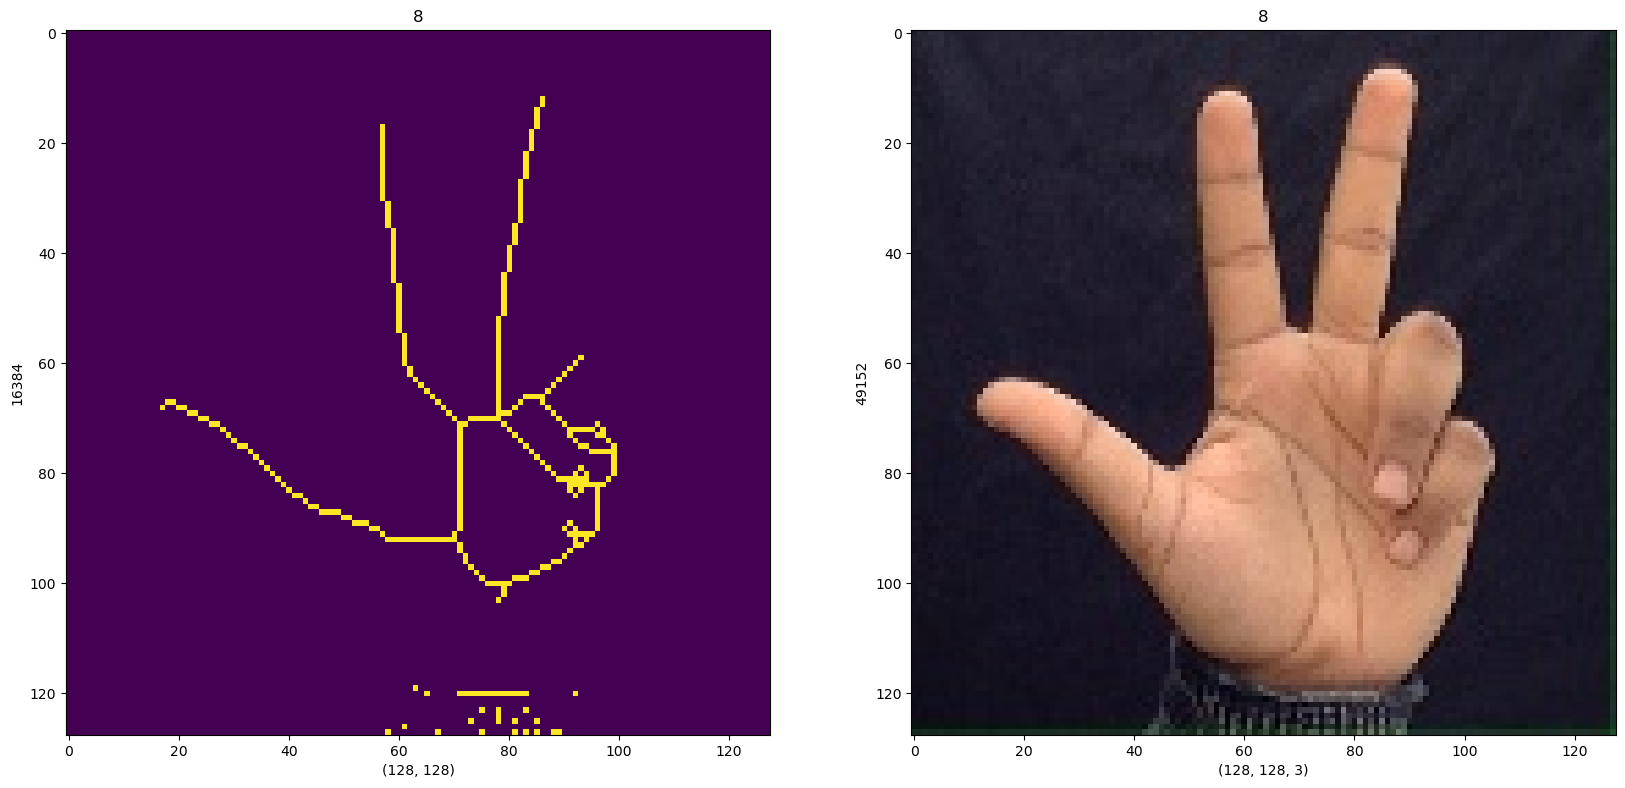

In [33]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(20,20))

Skel_Img = skeleton_morph_vision(Main_Sign_Data["JPG"][22213])
Simple_Img = simple_vision(Main_Sign_Data["JPG"][22213])

axis[0].imshow(Skel_Img)
axis[0].set_xlabel(Skel_Img.shape)
axis[0].set_ylabel(Skel_Img.size)
axis[0].set_title(Main_Sign_Data["CATEGORY"][22213])
axis[1].imshow(Simple_Img)
axis[1].set_xlabel(Simple_Img.shape)
axis[1].set_ylabel(Simple_Img.size)
axis[1].set_title(Main_Sign_Data["CATEGORY"][22213])

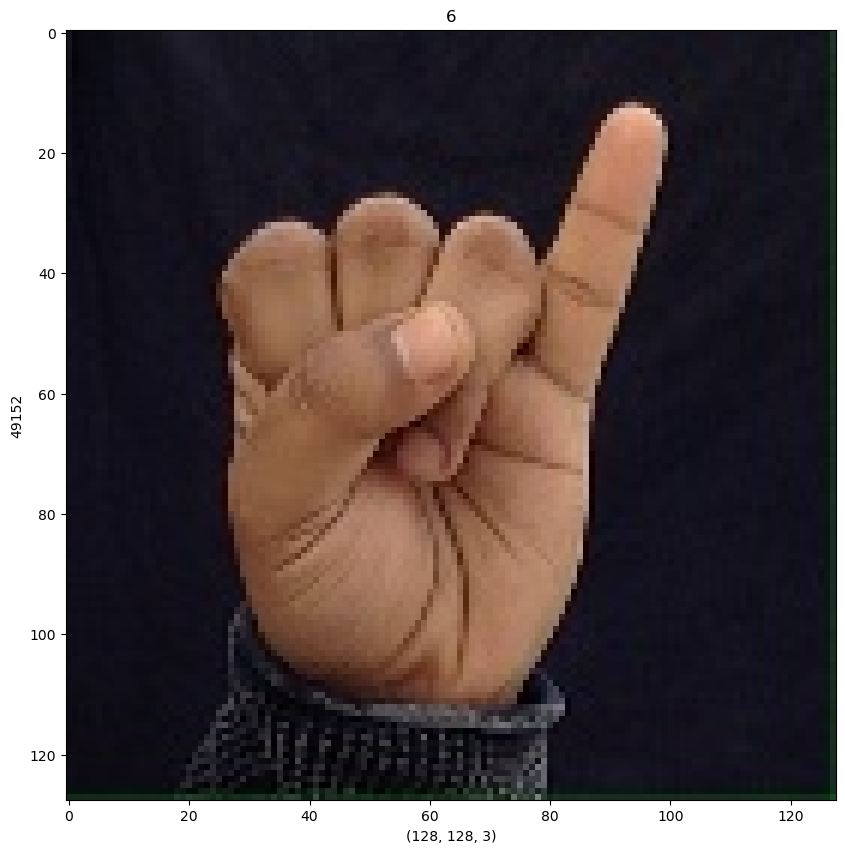

In [34]:
figure = plt.figure(figsize=(10,10))

Image_Sign = simple_vision(Main_Sign_Data["JPG"][10000])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][10000])
plt.imshow(Image_Sign)

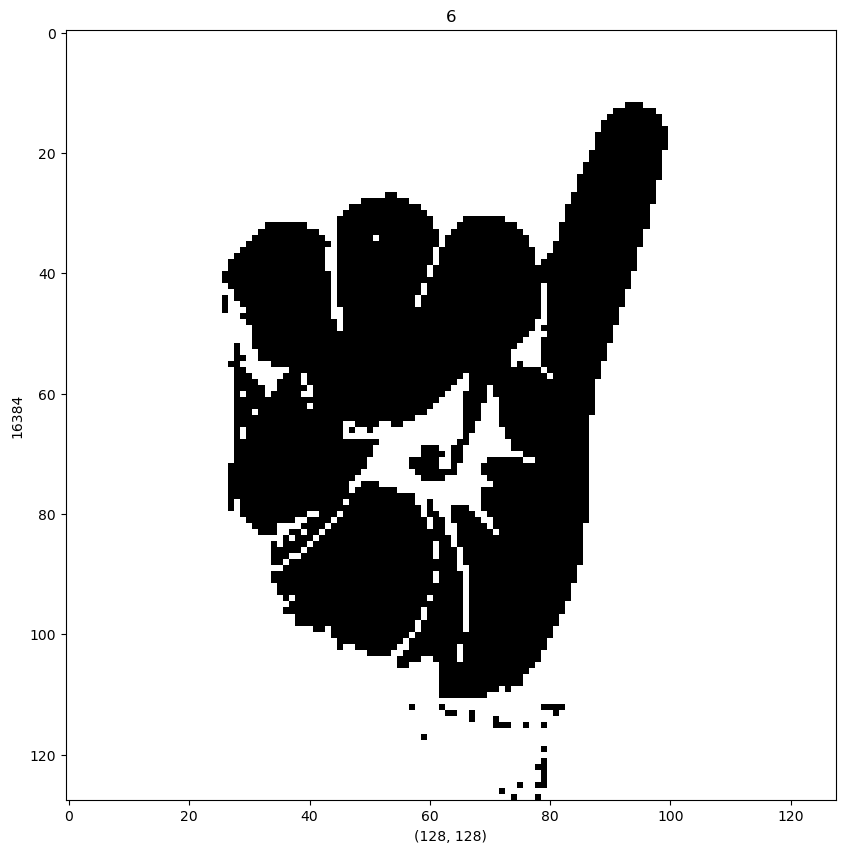

In [35]:
figure = plt.figure(figsize=(10,10))

Image_Sign = threshold_vision(Main_Sign_Data["JPG"][10000])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][10000])
plt.imshow(Image_Sign,cmap="gray")

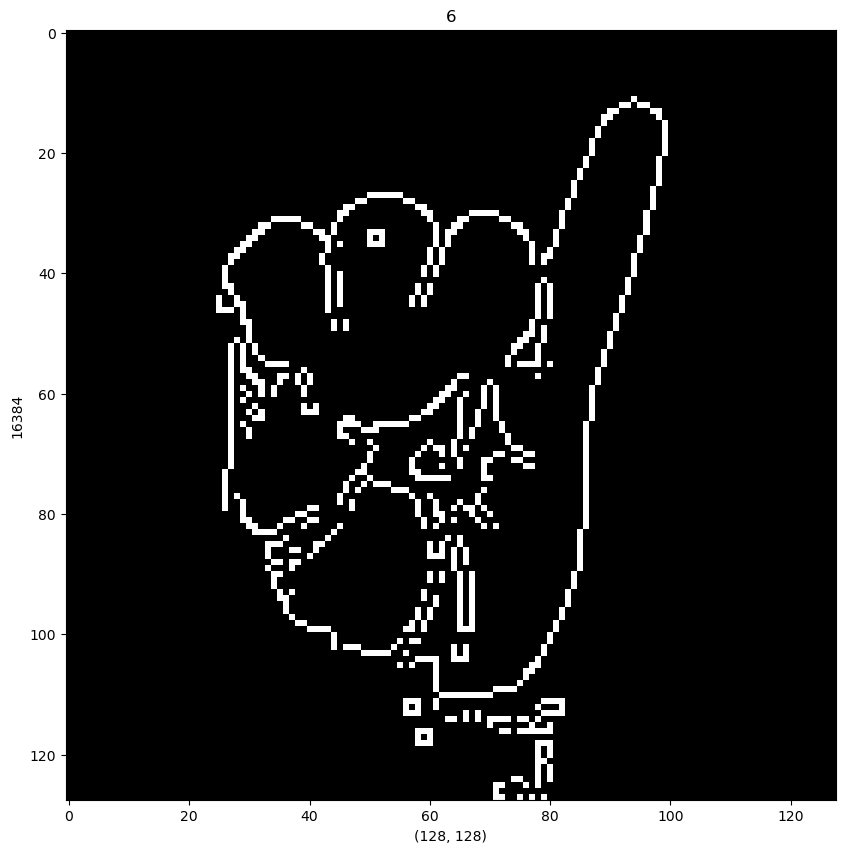

In [36]:
figure = plt.figure(figsize=(10,10))

Image_Sign = canny_vision(Main_Sign_Data["JPG"][10000])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][10000])
plt.imshow(Image_Sign,cmap="gray")

Text(0, 0.5, '16384')

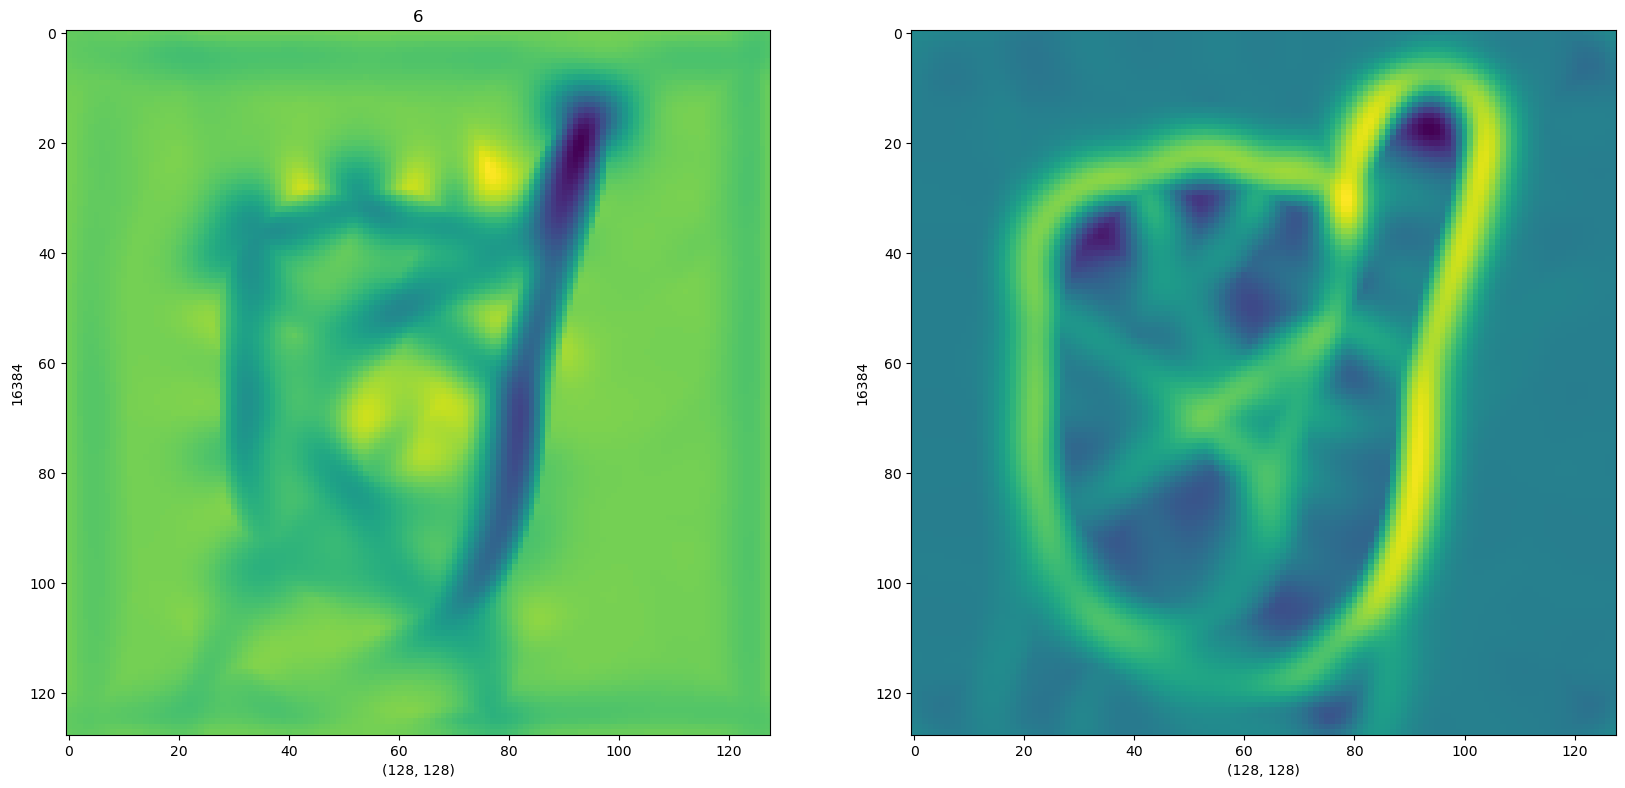

In [37]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(20,20))

Example_Image = cv2.cvtColor(cv2.imread(Main_Sign_Data["JPG"][10000]),cv2.COLOR_BGR2GRAY)

Hessian_Mat = hessian_matrix(Example_Image,sigma=5,order="rc")
max_S,min_S = hessian_matrix_eigvals(Hessian_Mat)

axis[0].imshow(min_S)
axis[0].set_xlabel(min_S.shape)
axis[0].set_ylabel(min_S.size)
axis[0].set_title(Main_Sign_Data["CATEGORY"][10000])
axis[1].imshow(max_S)
axis[1].set_xlabel(max_S.shape)
axis[1].set_ylabel(max_S.size)

Text(0.5, 1.0, '6')

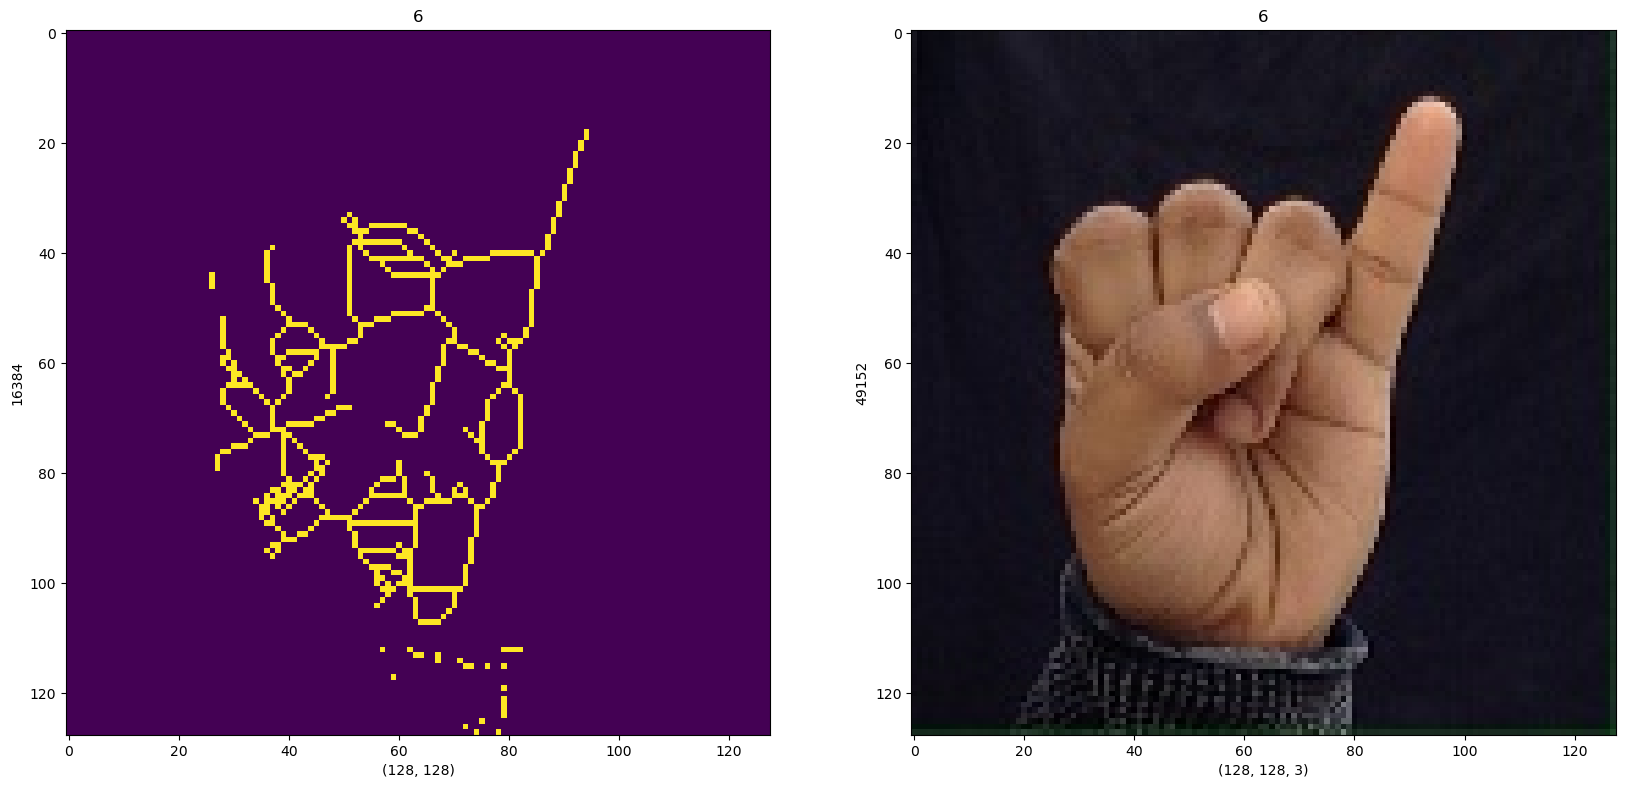

In [38]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(20,20))

Skel_Img = skeleton_morph_vision(Main_Sign_Data["JPG"][10000])
Simple_Img = simple_vision(Main_Sign_Data["JPG"][10000])

axis[0].imshow(Skel_Img)
axis[0].set_xlabel(Skel_Img.shape)
axis[0].set_ylabel(Skel_Img.size)
axis[0].set_title(Main_Sign_Data["CATEGORY"][10000])
axis[1].imshow(Simple_Img)
axis[1].set_xlabel(Simple_Img.shape)
axis[1].set_ylabel(Simple_Img.size)
axis[1].set_title(Main_Sign_Data["CATEGORY"][10000])

In [39]:
X_Train,X_Test = train_test_split(Main_Sign_Data,train_size=0.9,random_state=123,shuffle=True)


In [40]:
print(X_Train.shape)
print(X_Test.shape)


(75825, 2)
(8425, 2)


In [41]:
print(type(X_Train))
print(type(X_Test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [42]:
Train_IMG_Generator = ImageDataGenerator(rescale=1./255,
                                        zoom_range=0.5,
                                        shear_range=0.5,
                                        brightness_range=[0.6,1.0],
                                        rotation_range=35,
                                        width_shift_range=0.1,
                                        height_shift_range=0.1,
                                        vertical_flip=True,
                                         featurewise_std_normalization=False,
                                         samplewise_center=False,
                                         samplewise_std_normalization=False,
                                        fill_mode="nearest",
                                        validation_split=0.1)


In [43]:
Test_IMG_Generator = ImageDataGenerator(rescale=1./255)


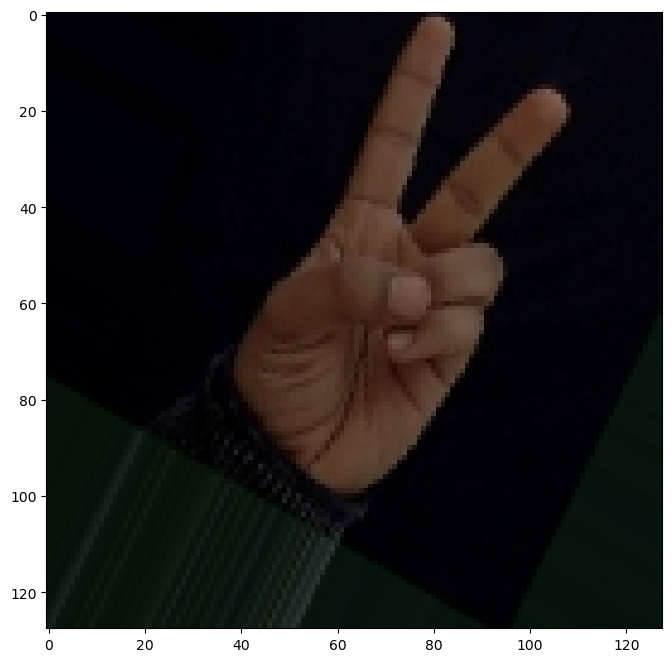

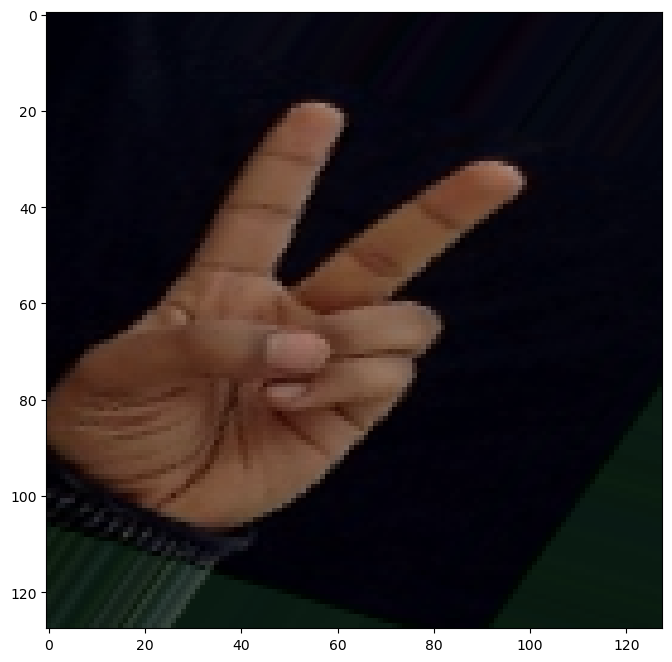

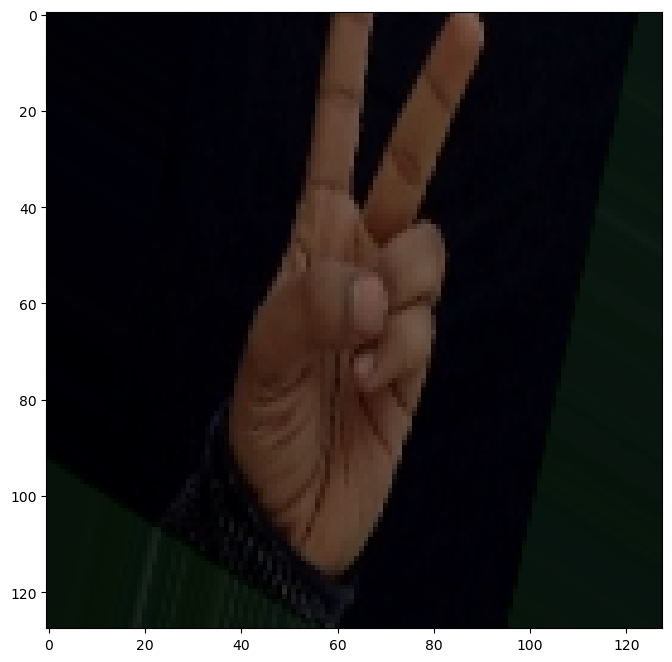

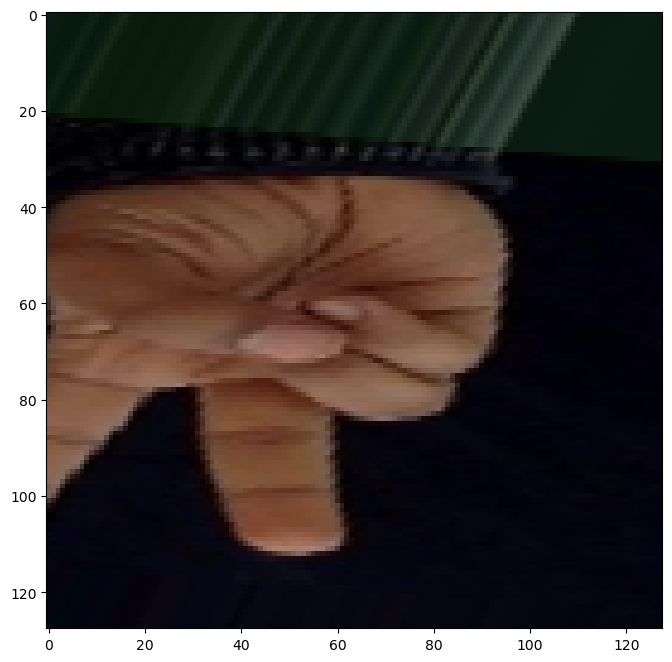

In [44]:
Example_Img = simple_vision(X_Train.JPG[3])
Example_Img = Example_Img.reshape((1,) + Example_Img.shape)

i = 0 

for batch in Train_IMG_Generator.flow(Example_Img,batch_size=32):
    
    figure = plt.figure(figsize=(8,8))
    plt.imshow(image.img_to_array(batch[0]))
    
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [45]:
Train_Set = Train_IMG_Generator.flow_from_dataframe(dataframe=X_Train,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   batch_size=32,
                                                   class_mode="categorical",
                                                   color_mode="grayscale",
                                                   subset="training")


Found 68243 validated image filenames belonging to 36 classes.


In [46]:
Validation_Set = Train_IMG_Generator.flow_from_dataframe(dataframe=X_Train,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   batch_size=32,
                                                   class_mode="categorical",
                                                   color_mode="grayscale",
                                                   subset="validation")

Found 7582 validated image filenames belonging to 36 classes.


In [47]:
Test_Set = Test_IMG_Generator.flow_from_dataframe(dataframe=X_Test,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   batch_size=32,
                                                   class_mode="categorical",
                                                   color_mode="grayscale",
                                                   shuffle=False)

Found 8425 validated image filenames belonging to 36 classes.


In [48]:
print("TRAIN: ")
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

TRAIN: 
{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, 'A': 9, 'B': 10, 'C': 11, 'D': 12, 'E': 13, 'F': 14, 'G': 15, 'H': 16, 'I': 17, 'J': 18, 'K': 19, 'L': 20, 'M': 21, 'N': 22, 'O': 23, 'P': 24, 'Q': 25, 'R': 26, 'S': 27, 'T': 28, 'U': 29, 'V': 30, 'W': 31, 'X': 32, 'Y': 33, 'Z': 34, 'none': 35}
[32, 8, 21, 13, 29]
(256, 256, 1)
------------------------------------------------------------
VALIDATION: 
{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, 'A': 9, 'B': 10, 'C': 11, 'D': 12, 'E': 13, 'F': 14, 'G': 15, 'H': 16, 'I': 17, 'J': 18, 'K': 19, 'L': 20, 'M': 21, 'N': 22, 'O': 23, 'P': 24, 'Q': 25, 'R': 26, 'S': 27, 'T': 28, 'U': 29, 'V': 30, 'W': 31, 'X': 32, 'Y': 33, 'Z': 34, 'none': 35}
[7, 32, 23, 4, 28]
(256, 256, 1)
------------------------------------------------------------
TEST: 
{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, 'A': 9, 'B': 10, 'C': 11, 'D': 12, 'E': 13, 'F': 14, 'G': 15, 'H': 16, 'I'

In [49]:
COMPILE_OPTIMIZER = "adam"
COMPILE_LOSS = "categorical_crossentropy"
COMPILE_METRICS = ["accuracy"]
INPUT_DIM = (256,256,1)
OUTPUT_DIM = 36

In [50]:
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True,
    filepath="./modelcheck.weights.h5"
)


In [51]:
Model = Sequential()

Model.add(Conv2D(24,(3,3),activation="relu",input_shape=INPUT_DIM))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
Model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(256,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Flatten())
Model.add(Dense(2352,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(OUTPUT_DIM,activation="softmax"))

In [52]:
Model.compile(optimizer=COMPILE_OPTIMIZER,loss=COMPILE_LOSS,metrics=COMPILE_METRICS)

In [53]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define Early_Stopper and Checkpoint_Model
Early_Stopper = EarlyStopping(monitor='val_loss', patience=3)
Checkpoint_Model = ModelCheckpoint('best_model.h5', save_best_only=True)

# Now, you can use them in your model.fit() call
CNN_Model = Model.fit(Train_Set,
                      validation_data=Validation_Set,
                      callbacks=[Early_Stopper, Checkpoint_Model],
                      epochs=3)

Epoch 1/3
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 0s 999ms/step - accuracy: 0.6608 - loss: 1.1660

2133/2133 ━━━━━━━━━━━━━━━━━━━━ 2190s 1s/step - accuracy: 0.6609 - loss: 1.1657 - val_accuracy: 0.9648 - val_loss: 0.2797
Epoch 2/3
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 0s 958ms/step - accuracy: 0.9676 - loss: 0.1010

2133/2133 ━━━━━━━━━━━━━━━━━━━━ 2096s 983ms/step - accuracy: 0.9676 - loss: 0.1010 - val_accuracy: 0.9549 - val_loss: 0.2510
Epoch 3/3
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9804 - loss: 0.0674

2133/2133 ━━━━━━━━━━━━━━━━━━━━ 3707s 2s/step - accuracy: 0.9804 - loss: 0.0674 - val_accuracy: 0.9958 - val_loss: 0.0395


In [54]:
Model.save('my_model.keras')

<Axes: >

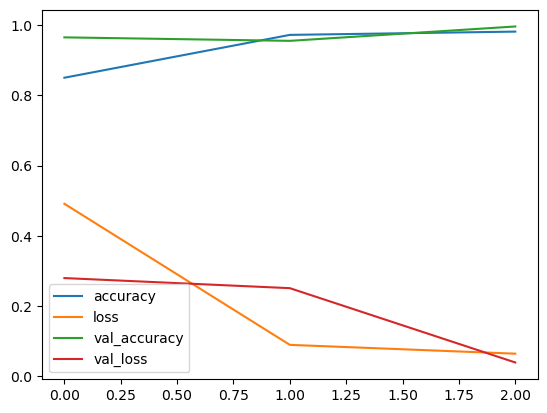

In [55]:
Grap_Data = pd.DataFrame(CNN_Model.history)
Grap_Data.plot()

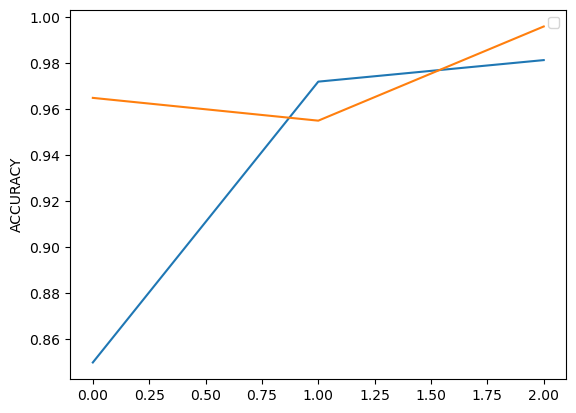

In [56]:
plt.plot(CNN_Model.history["accuracy"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()


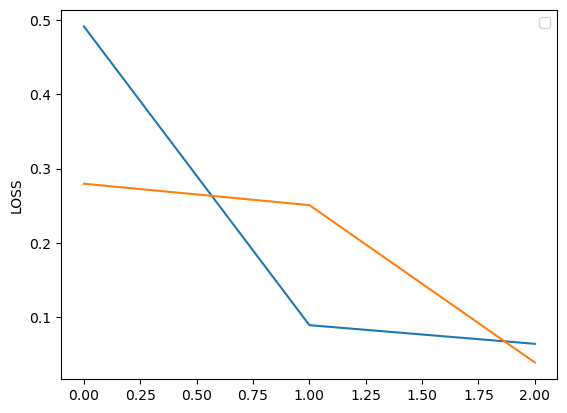

In [57]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

In [58]:
Model_Results = Model.evaluate(Test_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

264/264 ━━━━━━━━━━━━━━━━━━━━ 43s 163ms/step - accuracy: 0.9996 - loss: 0.0016
LOSS:  0.0020
ACCURACY:  1.00


In [59]:
Model_Test_Prediction = Model.predict(Test_Set)
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)

264/264 ━━━━━━━━━━━━━━━━━━━━ 43s 163ms/step


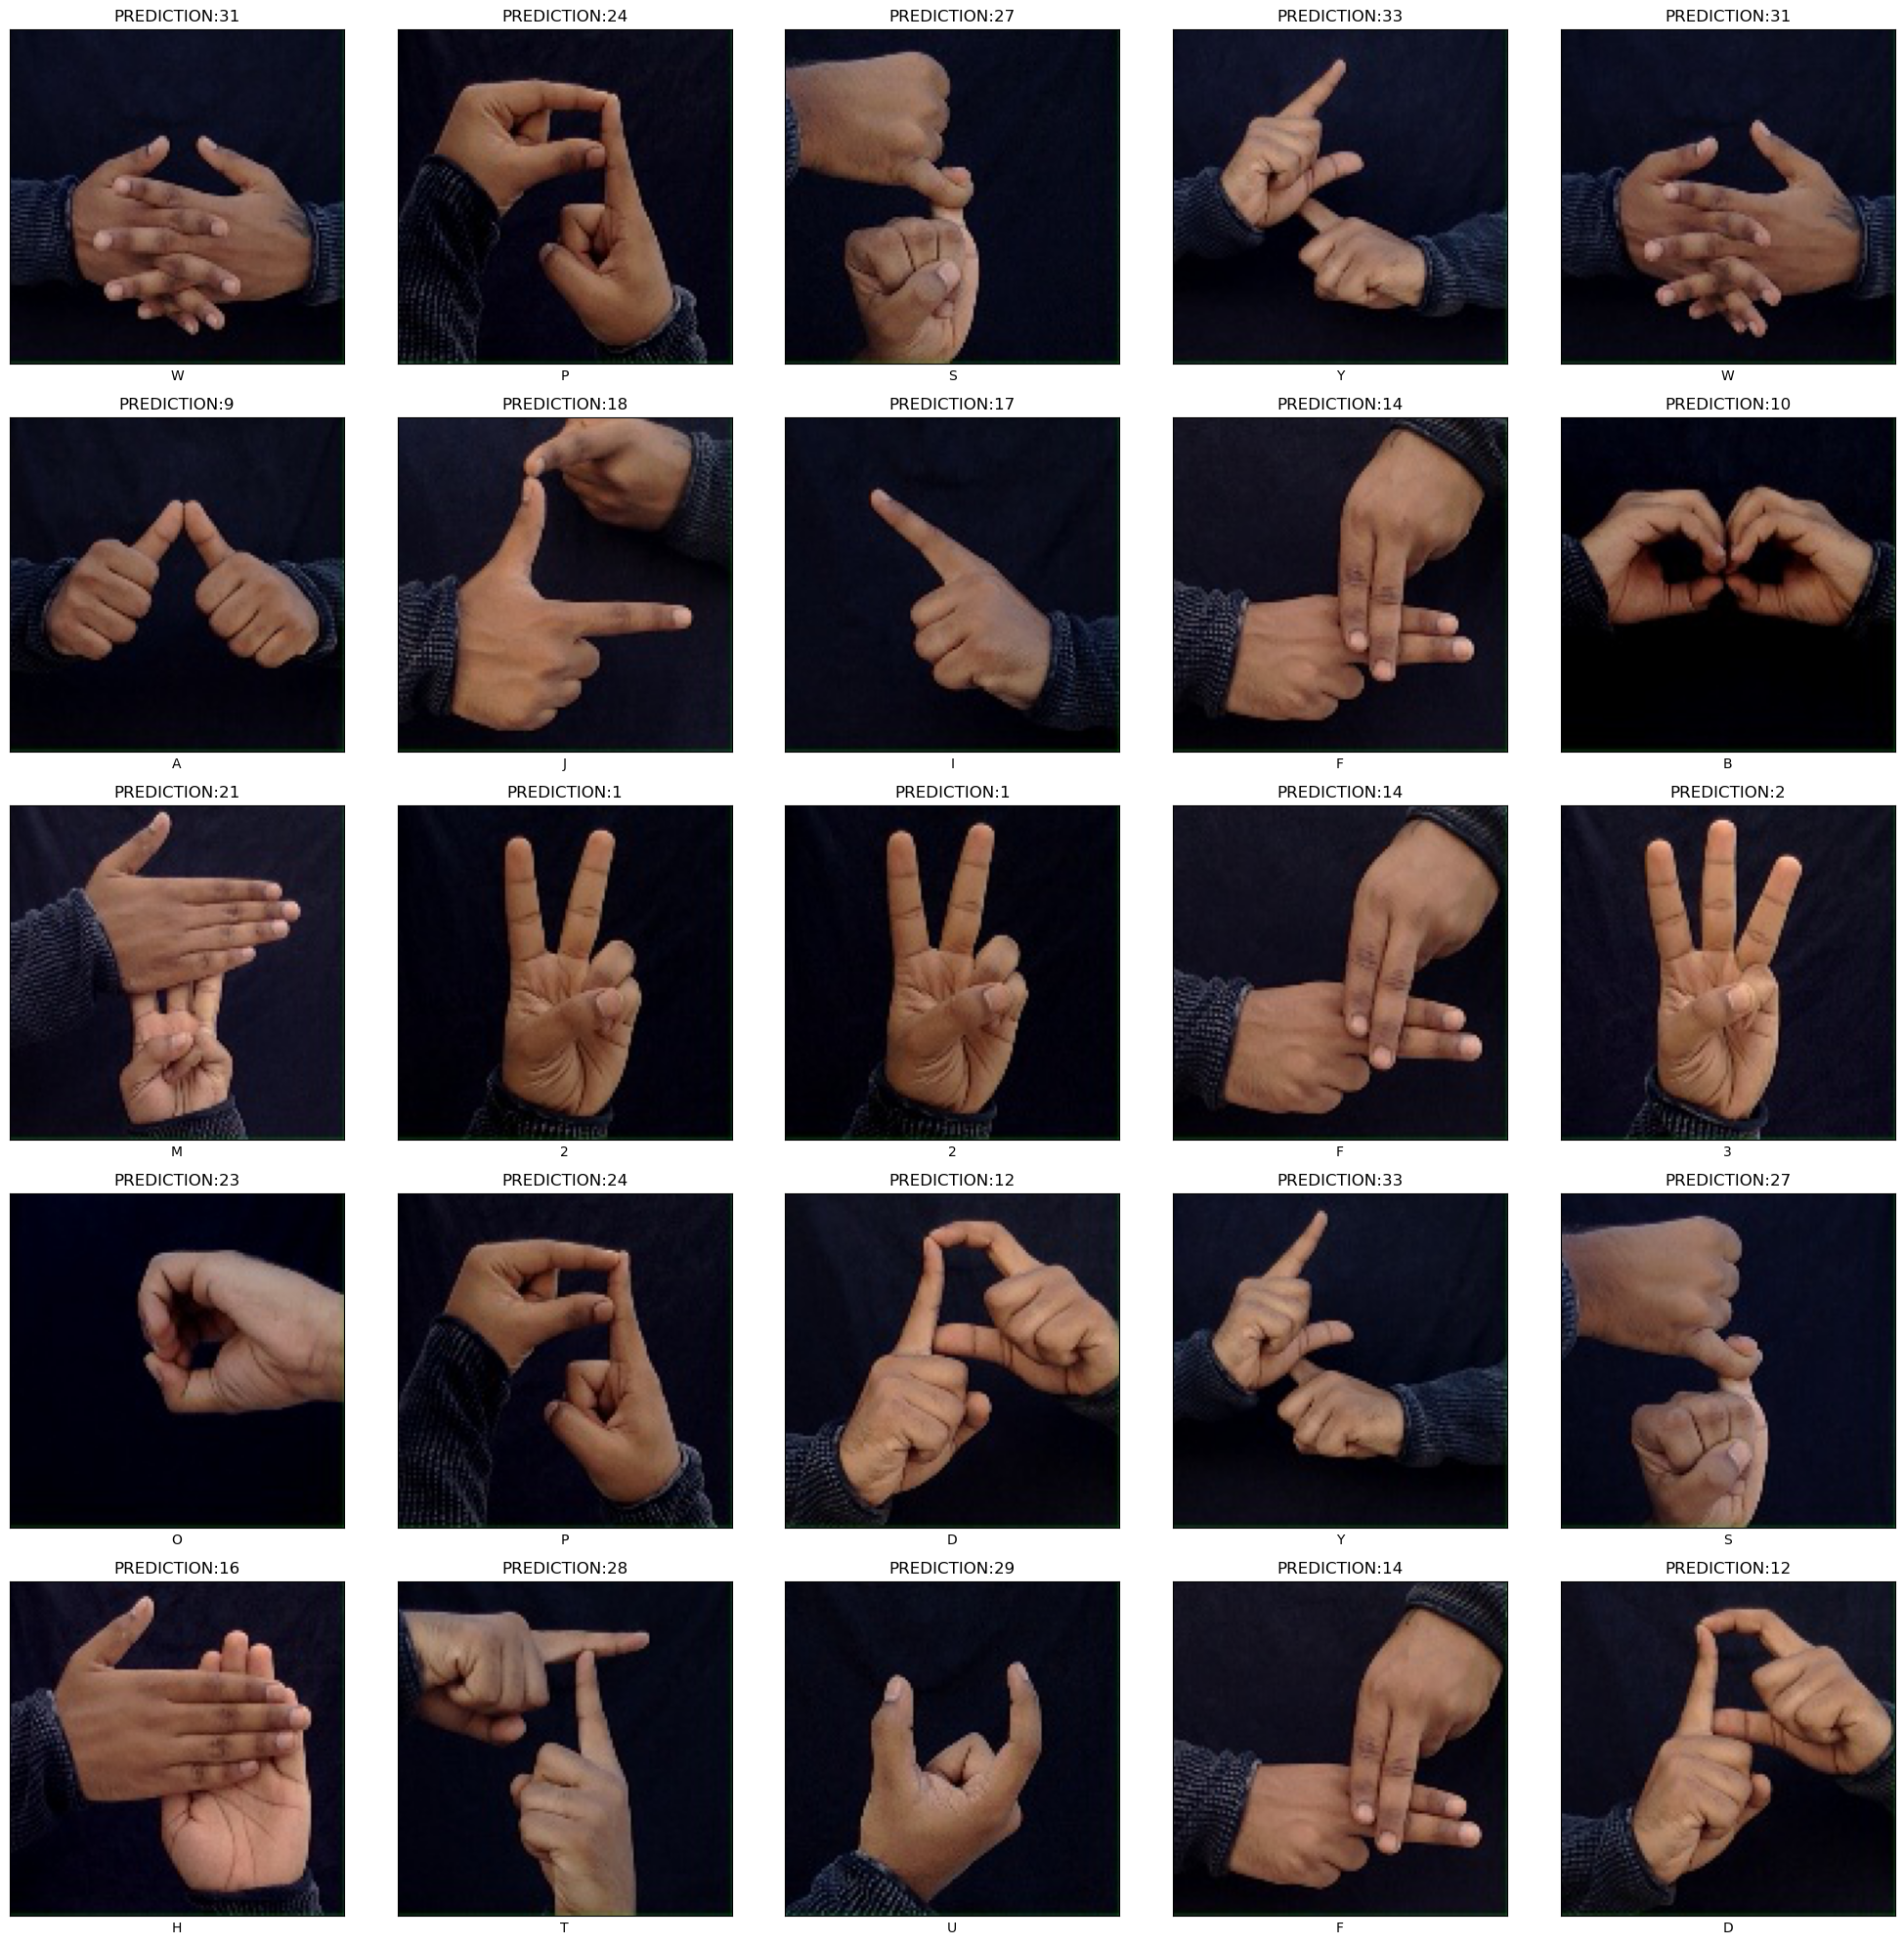

In [68]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(X_Test["JPG"].iloc[i]))
    ax.set_title(f"PREDICTION:{Model_Test_Prediction[i]}")
    ax.set_xlabel(X_Test["CATEGORY"].iloc[i])
plt.tight_layout()
plt.show()

In [69]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Draw a rectangle (region of interest)
    x, y, w, h = 100, 100, 300, 300
    roi = frame[y:y+h, x:x+w]

    # Preprocess the ROI to match model input size
    img = cv2.resize(roi, (256, 256))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)  # (1, 64, 64, 3)

    # Predict the label
    prediction = model.predict(img)
    predicted_class = labels[np.argmax(prediction)]

    # Display results
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.putText(frame, f'Prediction: {predicted_class}', (10, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 3)

    cv2.imshow("Sign Language Translator", frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (1, 256, 256, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 256, 256, 3), dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [ ]:
qqqqqqqqqq